## In this notebook we will attempt a multiclass classification. The goal is to create an algorithm that predicts in which category the sample falls into.

In [70]:
import pandas as pd

In [71]:
#load tcga 
df_tcga = pd.read_csv('../Data/data.csv')

#df_gtex = pd.read_csv('../Data/df_gtex.csv')

In [72]:
#load also the detailed categories
categories = pd.read_csv('../Data/sample_categories.csv')

In [73]:
categories.head()

,Unnamed: 0,sample,detailed_category
0,1,TCGA-V4-A9EE-01,Uveal Melanoma
1,2,TCGA-VD-AA8N-01,Uveal Melanoma
2,3,TCGA-V4-A9EI-01,Uveal Melanoma
3,4,TCGA-VD-AA8O-01,Uveal Melanoma
4,5,TCGA-WC-A888-01,Uveal Melanoma


In [74]:
df_tcga.head()

,Unnamed: 0,ENSG00000000003.14,ENSG00000000005.5,ENSG00000000419.12,ENSG00000000457.13,ENSG00000000460.16,ENSG00000000938.12,ENSG00000000971.15,ENSG00000001036.13,ENSG00000001084.10,...,ENSG00000280314.1,ENSG00000280670.2,ENSG00000280789.1,ENSG00000280969.1,ENSG00000281106.2,ENSG00000281991.1,ENSG00000282419.1,ENSG00000282608.1,ENSG00000282757.1,ENSG00000282815.1
0,TCGA-AD-5900-01,10.670,0.000,10.38,9.036,8.496,8.563,10.050,11.44,10.860,...,0.0,6.704,10.920,0.0000,0.9745,9.797,0.0,7.375,0.0,0.0000
1,TCGA-BP-4968-01,11.580,5.298,10.51,9.421,7.842,10.280,12.410,12.69,10.940,...,0.0,7.174,11.350,0.0000,3.7550,9.462,0.0,9.454,0.0,0.8746
2,TCGA-NG-A4VU-01,9.693,3.262,11.00,9.155,9.683,7.383,8.848,11.19,9.806,...,0.0,6.339,10.810,0.0000,6.5250,4.545,0.0,7.105,0.0,0.0000
3,TCGA-CG-4305-01,10.260,0.000,11.10,9.465,9.078,9.173,12.320,12.09,12.220,...,0.0,6.743,9.858,0.9198,2.4490,8.339,0.0,8.972,0.0,0.0000
4,TCGA-AO-A03M-01,10.100,1.997,11.74,10.380,9.157,8.509,11.630,11.80,10.580,...,0.0,6.842,11.800,0.0000,1.4830,9.843,0.0,8.691,0.0,3.8250


In [75]:
df_tcga = df_tcga.rename(columns = {'Unnamed: 0':'sample'})

In [76]:
df_tcga.head()

,sample,ENSG00000000003.14,ENSG00000000005.5,ENSG00000000419.12,ENSG00000000457.13,ENSG00000000460.16,ENSG00000000938.12,ENSG00000000971.15,ENSG00000001036.13,ENSG00000001084.10,...,ENSG00000280314.1,ENSG00000280670.2,ENSG00000280789.1,ENSG00000280969.1,ENSG00000281106.2,ENSG00000281991.1,ENSG00000282419.1,ENSG00000282608.1,ENSG00000282757.1,ENSG00000282815.1
0,TCGA-AD-5900-01,10.670,0.000,10.38,9.036,8.496,8.563,10.050,11.44,10.860,...,0.0,6.704,10.920,0.0000,0.9745,9.797,0.0,7.375,0.0,0.0000
1,TCGA-BP-4968-01,11.580,5.298,10.51,9.421,7.842,10.280,12.410,12.69,10.940,...,0.0,7.174,11.350,0.0000,3.7550,9.462,0.0,9.454,0.0,0.8746
2,TCGA-NG-A4VU-01,9.693,3.262,11.00,9.155,9.683,7.383,8.848,11.19,9.806,...,0.0,6.339,10.810,0.0000,6.5250,4.545,0.0,7.105,0.0,0.0000
3,TCGA-CG-4305-01,10.260,0.000,11.10,9.465,9.078,9.173,12.320,12.09,12.220,...,0.0,6.743,9.858,0.9198,2.4490,8.339,0.0,8.972,0.0,0.0000
4,TCGA-AO-A03M-01,10.100,1.997,11.74,10.380,9.157,8.509,11.630,11.80,10.580,...,0.0,6.842,11.800,0.0000,1.4830,9.843,0.0,8.691,0.0,3.8250


In [77]:
df_tcga = df_tcga.set_index('sample')

In [78]:
# Outlier removal
import numpy as np
Q1 = np.percentile(df_tcga,25)
Q3 = np.percentile(df_tcga,75)
IQR = Q3 - Q1



In [79]:
df_tcga.shape

(10530, 19037)

In [80]:
df_tcga = df_tcga[~((df_tcga < (Q1 - 1.5 * IQR)) |(df_tcga > (Q3 + 1.5 * IQR))).any(axis=1)]



In [81]:
df_tcga.shape

(8135, 19037)

In [82]:
#Let's merge the tcga and categories dataset to find our classes

df_cancer = df_tcga.merge(categories, how = 'inner', right_on = 'sample', left_on ='sample')

In [83]:
df_cancer.head()

,sample,ENSG00000000003.14,ENSG00000000005.5,ENSG00000000419.12,ENSG00000000457.13,ENSG00000000460.16,ENSG00000000938.12,ENSG00000000971.15,ENSG00000001036.13,ENSG00000001084.10,...,ENSG00000280789.1,ENSG00000280969.1,ENSG00000281106.2,ENSG00000281991.1,ENSG00000282419.1,ENSG00000282608.1,ENSG00000282757.1,ENSG00000282815.1,Unnamed: 0,detailed_category
0,TCGA-AD-5900-01,10.670,0.000,10.38,9.036,8.496,8.563,10.050,11.44,10.860,...,10.92,0.0,0.9745,9.797,0.0,7.375,0.0,0.000,7563,Colon Adenocarcinoma
1,TCGA-NG-A4VU-01,9.693,3.262,11.00,9.155,9.683,7.383,8.848,11.19,9.806,...,10.81,0.0,6.5250,4.545,0.0,7.105,0.0,0.000,325,Uterine Carcinosarcoma
2,TCGA-AO-A03M-01,10.100,1.997,11.74,10.380,9.157,8.509,11.630,11.80,10.580,...,11.80,0.0,1.4830,9.843,0.0,8.691,0.0,3.825,9319,Breast Invasive Carcinoma
3,TCGA-ZH-A8Y6-01,8.829,0.000,9.98,10.250,7.969,6.318,11.210,13.53,11.010,...,10.09,0.0,3.6430,7.444,0.0,6.625,0.0,0.000,7812,Cholangiocarcinoma
4,TCGA-29-1699-01,12.050,3.039,11.46,9.581,9.592,8.519,10.880,11.88,10.410,...,10.54,0.0,2.7750,8.694,0.0,10.520,0.0,2.846,3636,Ovarian Serous Cystadenocarcinoma


In [84]:
#Let's see if we have any sample that does not belong to any category and drop it
df_cancer[df_cancer['detailed_category'].isnull() == True]

,sample,ENSG00000000003.14,ENSG00000000005.5,ENSG00000000419.12,ENSG00000000457.13,ENSG00000000460.16,ENSG00000000938.12,ENSG00000000971.15,ENSG00000001036.13,ENSG00000001084.10,...,ENSG00000280789.1,ENSG00000280969.1,ENSG00000281106.2,ENSG00000281991.1,ENSG00000282419.1,ENSG00000282608.1,ENSG00000282757.1,ENSG00000282815.1,Unnamed: 0,detailed_category
3045,TCGA-07-0249-20,10.81,0.0,11.47,8.522,9.518,3.451,9.843,12.38,10.58,...,10.08,0.0,0.0,8.108,0.0,2.108,0.0,1.073,10535,NaN


In [85]:
df_cancer = df_cancer.drop(index = 3045)

In [86]:
df_cancer = df_cancer.drop(columns = 'Unnamed: 0')

In [87]:
df_cancer.isnull().values.any()

False

### Let's check for class imbalance

<AxesSubplot:>

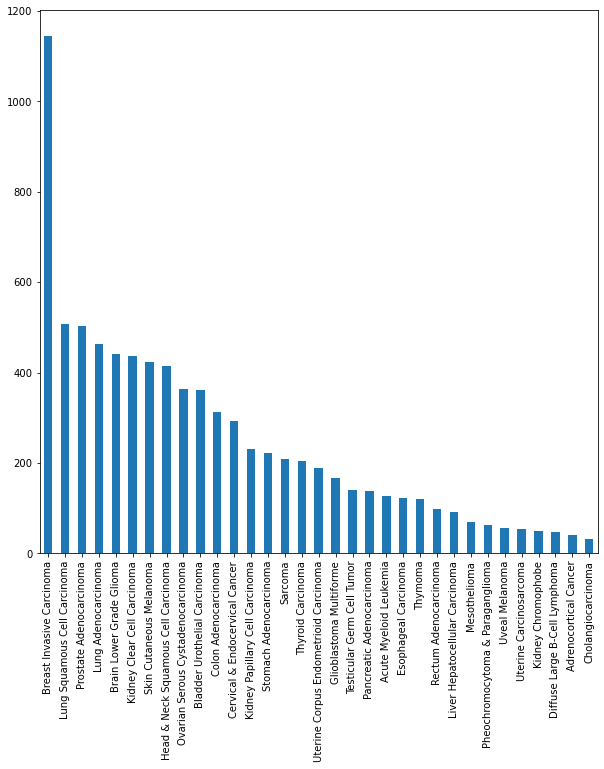

In [88]:
from matplotlib.pyplot import figure

fig = figure(figsize =(10,10))
df_cancer['detailed_category'].value_counts().plot(kind = 'bar')


### The Breast invasive carcinoma samples vastly outnumber the rest. In order to tackle class imbalance we will use class weight in our algorithm further down below

### First we will transform our classes into number

In [89]:
list_categories = list(df_cancer['detailed_category'].unique())

In [90]:
dict_categories = dict(zip(list_categories, range(len(list_categories))))


In [91]:
dict_categories

{'Colon Adenocarcinoma': 0,
 'Uterine Carcinosarcoma': 1,
 'Breast Invasive Carcinoma': 2,
 'Cholangiocarcinoma': 3,
 'Ovarian Serous Cystadenocarcinoma': 4,
 'Prostate Adenocarcinoma': 5,
 'Sarcoma': 6,
 'Brain Lower Grade Glioma': 7,
 'Pheochromocytoma & Paraganglioma': 8,
 'Head & Neck Squamous Cell Carcinoma': 9,
 'Kidney Clear Cell Carcinoma': 10,
 'Bladder Urothelial Carcinoma': 11,
 'Uterine Corpus Endometrioid Carcinoma': 12,
 'Skin Cutaneous Melanoma': 13,
 'Lung Adenocarcinoma': 14,
 'Stomach Adenocarcinoma': 15,
 'Cervical & Endocervical Cancer': 16,
 'Lung Squamous Cell Carcinoma': 17,
 'Esophageal Carcinoma': 18,
 'Pancreatic Adenocarcinoma': 19,
 'Acute Myeloid Leukemia': 20,
 'Kidney Chromophobe': 21,
 'Mesothelioma': 22,
 'Kidney Papillary Cell Carcinoma': 23,
 'Testicular Germ Cell Tumor': 24,
 'Thyroid Carcinoma': 25,
 'Glioblastoma Multiforme': 26,
 'Thymoma': 27,
 'Rectum Adenocarcinoma': 28,
 'Liver Hepatocellular Carcinoma': 29,
 'Diffuse Large B-Cell Lymphoma': 3

In [92]:
df_cancer = df_cancer.replace({'detailed_category':dict_categories})

In [93]:
df_cancer.head()

,sample,ENSG00000000003.14,ENSG00000000005.5,ENSG00000000419.12,ENSG00000000457.13,ENSG00000000460.16,ENSG00000000938.12,ENSG00000000971.15,ENSG00000001036.13,ENSG00000001084.10,...,ENSG00000280670.2,ENSG00000280789.1,ENSG00000280969.1,ENSG00000281106.2,ENSG00000281991.1,ENSG00000282419.1,ENSG00000282608.1,ENSG00000282757.1,ENSG00000282815.1,detailed_category
0,TCGA-AD-5900-01,10.670,0.000,10.38,9.036,8.496,8.563,10.050,11.44,10.860,...,6.704,10.92,0.0,0.9745,9.797,0.0,7.375,0.0,0.000,0
1,TCGA-NG-A4VU-01,9.693,3.262,11.00,9.155,9.683,7.383,8.848,11.19,9.806,...,6.339,10.81,0.0,6.5250,4.545,0.0,7.105,0.0,0.000,1
2,TCGA-AO-A03M-01,10.100,1.997,11.74,10.380,9.157,8.509,11.630,11.80,10.580,...,6.842,11.80,0.0,1.4830,9.843,0.0,8.691,0.0,3.825,2
3,TCGA-ZH-A8Y6-01,8.829,0.000,9.98,10.250,7.969,6.318,11.210,13.53,11.010,...,5.651,10.09,0.0,3.6430,7.444,0.0,6.625,0.0,0.000,3
4,TCGA-29-1699-01,12.050,3.039,11.46,9.581,9.592,8.519,10.880,11.88,10.410,...,6.795,10.54,0.0,2.7750,8.694,0.0,10.520,0.0,2.846,4


In [94]:
df_cancer = df_cancer.set_index('sample')

In [95]:
df_cancer.shape

(8134, 19038)

In [96]:
#randomize the samples
df_cancer = df_cancer.sample(frac = 1)

In [97]:
# let's keep a portion of the dataset as a test set for later evaluating our model
train_df = df_cancer[:6508]
test_df = df_cancer[6508:8134]

## We first need to apply dimensionality reduction i.e. PCA as the number of features vastly outnumber the number of samples that we have

In [98]:
X = train_df.drop(columns = 'detailed_category')
target = train_df['detailed_category']

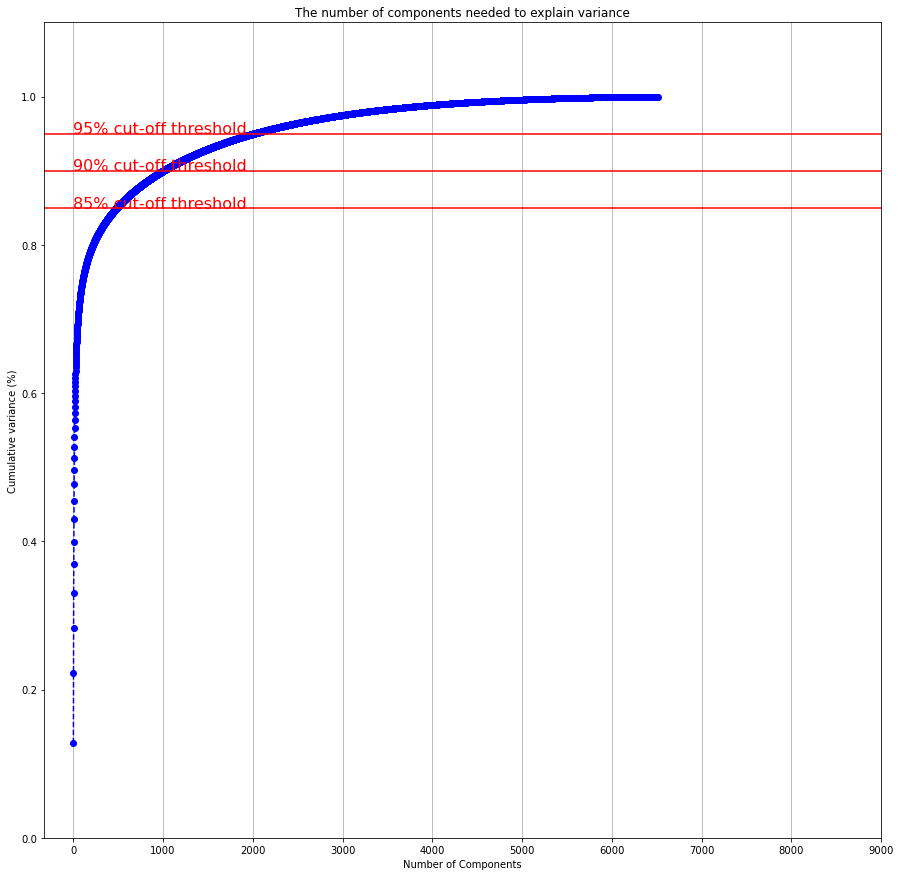

In [99]:
#We use the plot to see how many of the principal components we will keep
from sklearn.decomposition import PCA

import numpy as np
pca = PCA().fit(X)

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,15)

fig, ax = plt.subplots()
xi = np.arange(1, 6509, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 10000, step=1000)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.95, '95% cut-off threshold', color = 'red', fontsize=16)

plt.axhline(y=0.90, color='r', linestyle='-')
plt.text(0.5, 0.90, '90% cut-off threshold', color = 'red', fontsize=16)

plt.axhline(y=0.85, color='r', linestyle='-')
plt.text(0.1, 0.85, '85% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [100]:
# Transform the data

from sklearn.decomposition import PCA
pca_85= PCA(0.85)

'''fit PCA on dataset.'''
principalComponents_85 = pca_85.fit_transform(X)

'''print number of components'''
print("n.comps:", pca_85.n_components_)

principal85_df = pd.DataFrame(data = principalComponents_85)



n.comps: 484


In [101]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(principal85_df, target, test_size = 0.2, random_state = 20)

## Now we are ready to apply our machine learning algorithms. We will try out a number of them before choosing which one is the best one

In [102]:
#The algorithms below support multiclass classification natively i.e. they will produce N x N confusion matrices
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.utils import class_weight
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, balanced_accuracy_score, recall_score
from sklearn.model_selection import cross_val_score


In [103]:
classes = list(np.unique(y_train))

In [104]:
from sklearn.utils import class_weight
class_weight = class_weight.compute_class_weight('balanced',
                                                classes,
                                                y_train)



/home/ubuntu/anaconda3/envs/tf-gpu/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32], y=sample
TCGA-E3-A3E1-01    25
TCGA-97-A4M7-01    14
TCGA-BH-A0H5-11     2
TCGA-C8-A12L-01     2
TCGA-AK-3455-01    10
                   ..
TCGA-HC-A8D0-01     5
TCGA-D3-A2J7-06    13
TCGA-CG-5722-01    15
TCGA-27-1832-01    26
TCGA-18-3412-01    17
Name: detailed_category, Length: 5206, dtype: int64 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


In [105]:
weights = list(class_weight)

In [106]:
weights_dict = dict(zip(classes,weights))

In [146]:
estimators = [LogisticRegression(class_weight = weights_dict),
            DecisionTreeClassifier(class_weight = weights_dict),
            RandomForestClassifier(class_weight = weights_dict),
            LinearSVC(class_weight = weights_dict)
            ]

metrics = {}
for estimator in estimators:
    estimator.fit(X_train, y_train)
    predictions = estimator.predict(X_test)
    metrics[str(estimator).split('(')[0]] = {
        'balanced accuracy':round(balanced_accuracy_score(y_test, predictions),2),
        'macro f1':round(f1_score(y_test, predictions, average='macro'),2),
        'recall': (recall_score(y_test, predictions, average = 'macro')),
    }

/home/ubuntu/anaconda3/envs/tf-gpu/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/ubuntu/anaconda3/envs/tf-gpu/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stabl

/home/ubuntu/anaconda3/envs/tf-gpu/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/ubuntu/anaconda3/envs/tf-gpu/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stabl

/home/ubuntu/anaconda3/envs/tf-gpu/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/ubuntu/anaconda3/envs/tf-gpu/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stabl

In [150]:
metrics_df = pd.DataFrame(metrics)

In [151]:
metrics_df

,LogisticRegression,DecisionTreeClassifier,RandomForestClassifier,LinearSVC
balanced accuracy,0.920000,0.77000,0.850000,0.750000
macro f1,0.910000,0.77000,0.870000,0.730000
recall,0.924749,0.77062,0.848818,0.754141


### From the above we see that so far the LogisticRegression algorithm performs best.



/home/ubuntu/anaconda3/envs/tf-gpu/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


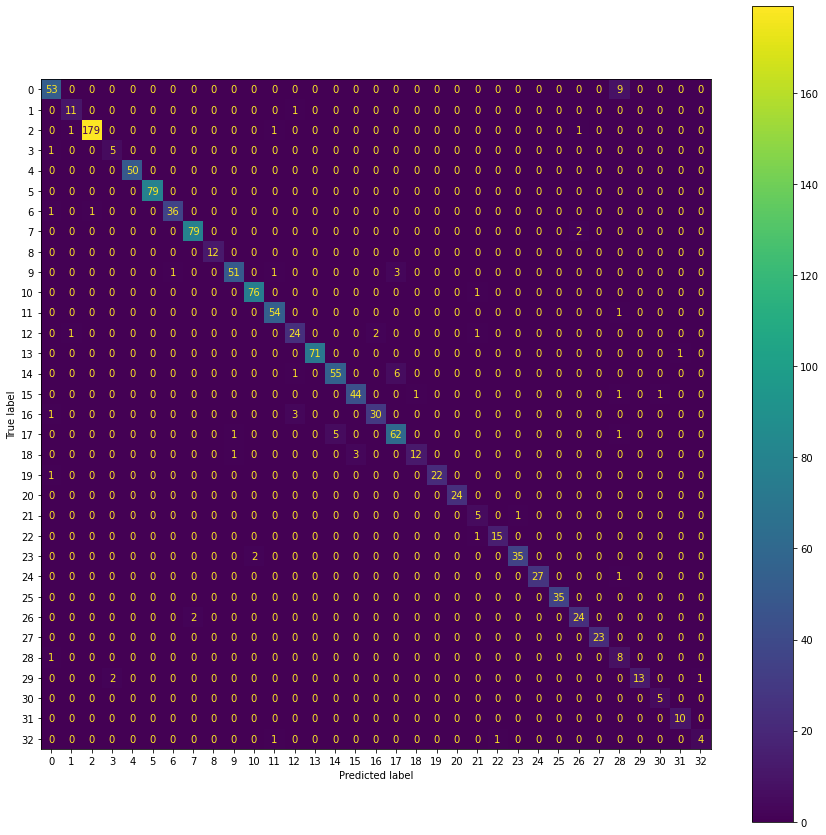

In [110]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

model = LogisticRegression(class_weight = weights_dict)
model.fit(X_train, y_train)
preds = model.predict(X_test)
cm = confusion_matrix(y_test, preds)

ConfusionMatrixDisplay(confusion_matrix = cm).plot()

<AxesSubplot:>

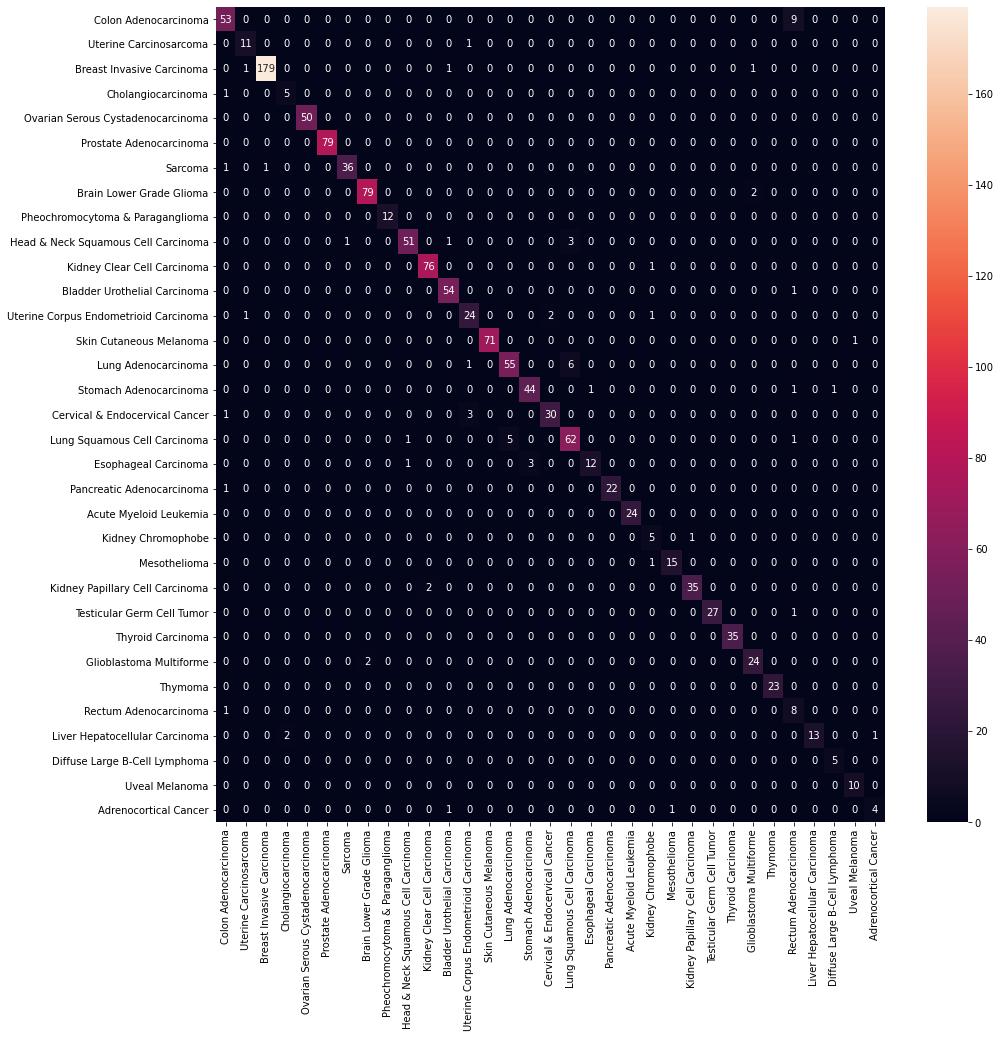

In [154]:
import seaborn as sns 

sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=dict_categories, yticklabels=dict_categories)

## Let's apply the above algorithm on our test set and see the results

In [129]:
test_df.head()

,ENSG00000000003.14,ENSG00000000005.5,ENSG00000000419.12,ENSG00000000457.13,ENSG00000000460.16,ENSG00000000938.12,ENSG00000000971.15,ENSG00000001036.13,ENSG00000001084.10,ENSG00000001167.14,...,ENSG00000280670.2,ENSG00000280789.1,ENSG00000280969.1,ENSG00000281106.2,ENSG00000281991.1,ENSG00000282419.1,ENSG00000282608.1,ENSG00000282757.1,ENSG00000282815.1,detailed_category
sample,,,,,,,,,,,,,,,,,,,,,
TCGA-L6-A4EQ-01,11.910,1.083,10.42,10.000,8.447,8.739,11.95,11.80,10.69,10.36,...,8.038,11.32,0.00,1.083,10.320,0.0,6.247,0.0,2.453,25
TCGA-XJ-A83G-01,11.110,2.431,9.82,9.267,7.697,6.764,8.31,11.64,10.80,9.90,...,8.174,11.22,3.71,2.103,8.475,0.0,5.833,0.0,1.069,5
TCGA-73-4662-01,12.030,6.543,10.55,11.120,10.610,10.380,11.48,11.78,9.05,11.85,...,7.549,10.79,0.00,2.063,10.810,0.0,8.599,0.0,1.184,14
TCGA-FA-A4XK-01,7.643,0.000,11.28,10.870,10.100,11.390,12.06,11.69,10.71,10.83,...,6.507,11.78,0.00,0.000,7.754,0.0,5.437,0.0,0.000,30
TCGA-55-7570-01,11.510,0.000,11.44,10.320,10.800,8.496,11.70,13.51,15.99,11.89,...,8.882,11.59,0.00,4.428,10.020,0.0,6.908,0.0,6.940,14


In [139]:
X_true = test_df.drop(columns = 'detailed_category')
y_true = test_df['detailed_category']

In [140]:
pc_test = pca_85.transform(X_true)

In [141]:
test_preds = model.predict(pc_test)

In [142]:
balanced_accuracy_score(y_true, test_preds)

0.9150580267784268

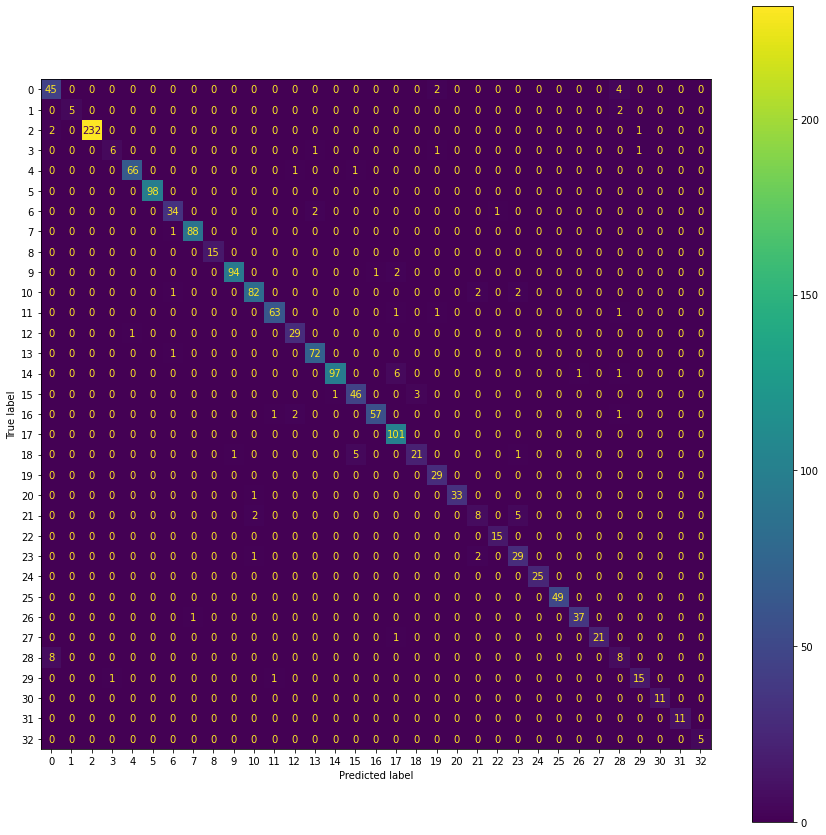

In [143]:
cm_test = confusion_matrix(y_true, test_preds)
ConfusionMatrixDisplay(confusion_matrix = cm_test).plot()

<AxesSubplot:>

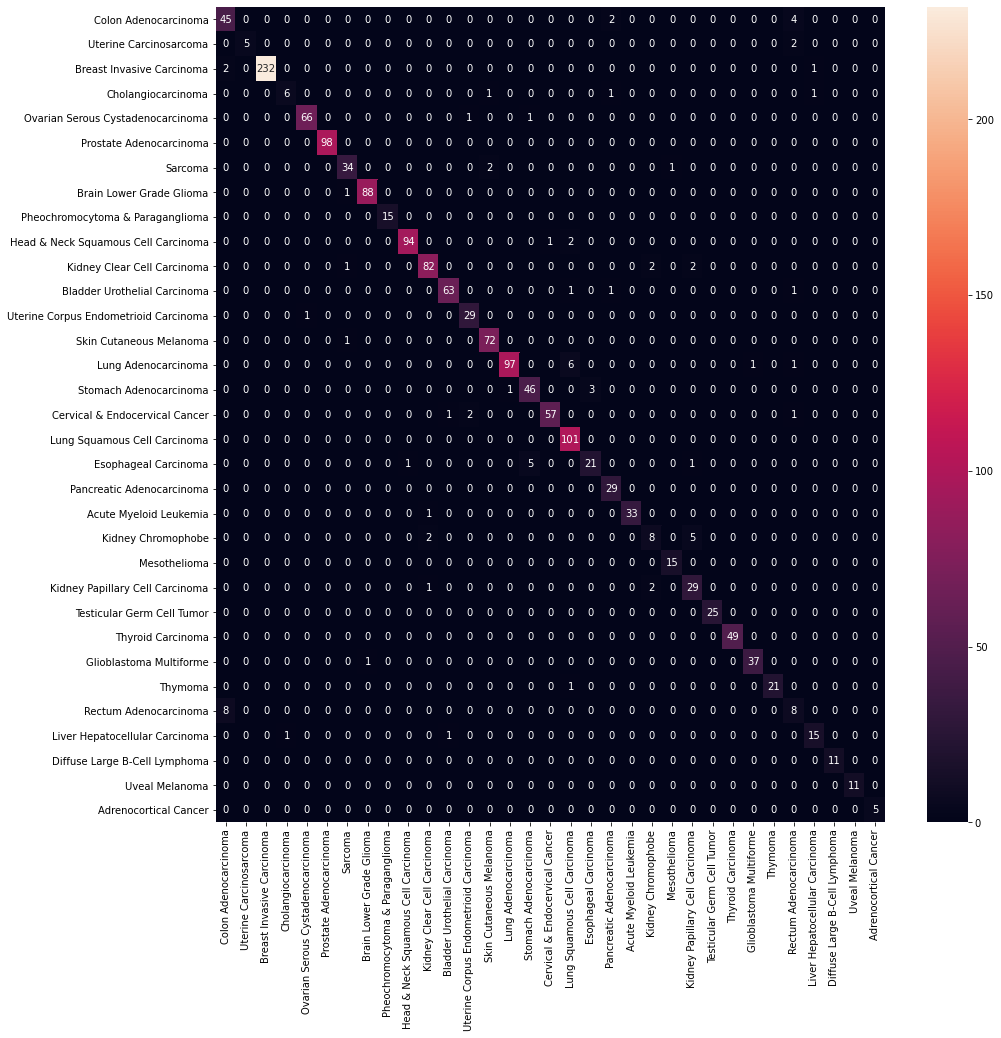

In [153]:
import seaborn as sns 

sns.heatmap(cm_test, annot=True, fmt='d',
            xticklabels=dict_categories, yticklabels=dict_categories)